# **The Battle of the Neighborhoods (Week 2)**

### Introduction

Tourism, the act and process of spending time away from home in pursuit of recreation, relaxation, and pleasure, while making use of the commercial provision of services. Tourism boosts the revenue of the economy, creates thousands of jobs, develops the infrastructures of a country, and plants a sense of cultural exchange between foreigners and citizens. Tourism in India is vital for the country's economy. There are 38 World Heritage sites in India that are recognised by the United Nations Educational, Scientific and Cultural Organization (UNESCO) as of August 2019.

### Business Problem

As mentioned earlier, tourism facilitates large number of employment opportunities. This project analyzes the most popular places in a state in India to recommend the best choice for setting up restaurants, hotels, souvenir shops or other businesses that tourism may help flourish. This project will also be helpful for freelancers like translators, artists, etc., to set up stalls.

### Data Description

#### Source : [List of Districts in India - Wikipedia Page](https://en.wikipedia.org/wiki/List_of_districts_in_India)

Beautifulsoup4 package can be used to scrape information and extract all the tables from this Wikipedia page and convert it into a pandas dataframe. Then, Python’s geopy package will be used to obtain the latitude and longitude of all the districts present in the dataframe.

#### Foursquare API Data:
Data about different venues in the specific districts will be needed. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

The data retrieved from Foursquare contains information of venues within a specified distance of the longitude and latitude of the postcodes. 

___

### Importing Libraries

In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import geocoder
import folium
from geopy.geocoders import Nominatim

import random 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
import json 
from pandas.io.json import json_normalize 
import math

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Web-Scraping to create a dataframe

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_districts_in_India"
html_data = requests.get(url).content
soup = BeautifulSoup(html_data,"html5lib")
t = soup.title

In [3]:
tables = soup.find_all("table",{'class':"wikitable"})

In [4]:
df2 = pd.read_html(str(tables))
df2 = pd.DataFrame(df2[0])
State_Unionlist = df2["Name of State or Union Territory"]

In [5]:
l = np.arange(2, 37, 1)

In [6]:
StateUnion =list()

In [7]:
df=pd.read_html(str(tables))
df= pd.DataFrame(df[1])
states = df.shape
for i in range(states[0]):
    StateUnion.append(State_Unionlist[0])
df["State/UnionTerritory"] = StateUnion
o = df.columns

In [8]:
df.rename(columns = {o[2]: "District", o[4] : "Population", o[6] : "Density (/km2)"}, inplace = True)

In [9]:
for i in l:
    dfn = pd.read_html(str(tables))
    df1 = pd.DataFrame(dfn[i])
    StateUnion =list()
    states = df1.shape
    for j in range(states[0]):
        StateUnion.append(State_Unionlist[i-1])
    df1["State/UnionTerritory"] = StateUnion
    o = df1.columns
    df1.rename(columns = {o[2]: "District", o[4] : "Population", o[5] : "Area (km2)", o[6] : "Density (/km2)"}, inplace = True)
    df = df.append(df1, ignore_index=True)

In [10]:
df.isnull().sum()
df.dropna(inplace = True)

In [11]:
df.drop(columns = {"#", "Code[5]"}, inplace = True)

### Dataframe with latitudes and longitudes 

In [12]:
Indialatlong = pd.read_csv("Indialatlong.csv")

In [13]:
Indialatlong.drop(columns = {"Unnamed: 0"}, inplace = True)

In [14]:
Indialatlong.dropna(inplace = True)

In [15]:
Indialatlong

,District,Headquarters,State/UnionTerritory,Latitude,Longitude
0,Anantapur,Anantapur,Andhra Pradesh,14.654623,77.556260
1,Chittoor,Chittoor,Andhra Pradesh,13.160105,79.155551
2,East Godavari,Kakinada,Andhra Pradesh,17.233496,81.722599
3,Guntur,Guntur,Andhra Pradesh,16.291519,80.454159
4,Kadapa,Kadapa,Andhra Pradesh,14.475294,78.821686
...,...,...,...,...,...
722,Shravasti,Shravasti,Uttar Pradesh,27.504639,80.829466
723,Siddharthnagar,Naugarh,Uttar Pradesh,24.386575,83.078631
724,Sitapur,Sitapur,Uttar Pradesh,26.242511,82.296169
725,Sonbhadra,Robertsganj,Uttar Pradesh,26.575504,80.613762


### Data Visualisation

In [16]:
state = input("Enter the state/union territory you want visit: ")

Enter the state/union territory you want visit:  Tamil Nadu


In [17]:
geolocator = Nominatim(user_agent="tst_explorer")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tamil Nadu are 10.9094334, 78.3665347.


In [18]:
df_user_state = Indialatlong[Indialatlong['State/UnionTerritory']==state].reset_index(drop=True)
df_user_state.dropna(inplace = True)
df_user_state

,District,Headquarters,State/UnionTerritory,Latitude,Longitude
0,Ariyalur,Ariyalur,Tamil Nadu,11.076036,79.117455
1,Chengalpattu,Chengalpattu,Tamil Nadu,12.684089,79.983637
2,Chennai,Chennai,Tamil Nadu,13.083694,80.270186
3,Coimbatore,Coimbatore,Tamil Nadu,11.001812,76.962843
4,Cuddalore,Cuddalore,Tamil Nadu,11.756433,79.763464
5,Dharmapuri,Dharmapuri,Tamil Nadu,12.096805,78.193043
6,Dindigul,Dindigul,Tamil Nadu,10.330330,78.067398
7,Erode,Erode,Tamil Nadu,11.369204,77.676627
8,Kallakurichi,Kallakurichi,Tamil Nadu,11.740626,78.963713
9,Kanchipuram,Kanchipuram,Tamil Nadu,12.836393,79.705330


#### Map of the state with the districts superimposed on it

In [19]:
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State/UnionTerritory'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

### Foursquare API

In [20]:
#defining Foursquare API credentials
CLIENT_ID = 'FoursquareID' # your Foursquare ID
CLIENT_SECRET = 'FoursquareSecret'  # your Foursquare Secret
VERSION = '20180605'  # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [21]:
#Getting the categories in Foursquare
url2 = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url2).json()

In [22]:
#Checking number of main categories and sub-categories present in Foursquare API
categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']

In [23]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

In [24]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [25]:
#Function to get the nearby venues of all the districts in the State
def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [26]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Ariyalur
Chengalpattu
Chennai
Coimbatore
Cuddalore
Dharmapuri
Dindigul
Erode
Kallakurichi
Kanchipuram
Kanyakumari
Karur
Krishnagiri
Madurai
Mayiladuthurai
Nagapattinam
Nilgiris
Namakkal
Perambalur
Pudukkottai
Ramanathapuram
Ranipet
Salem
Sivaganga
Tenkasi
Tiruppur
Tiruchirappalli
Theni
Tirunelveli
Thanjavur
Thoothukudi
Tirupattur
Tiruvallur
Tiruvarur
Tiruvannamalai
Vellore
Viluppuram
Virudhunagar


In [27]:
state_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ariyalur,11.076036,79.117455,Tanjavur Chola's Big Temple,10.782957,79.132663,Historic Site
1,Ariyalur,11.076036,79.117455,Tanjavur,10.777151,79.142018,Historic Site
2,Ariyalur,11.076036,79.117455,Maha Magam Tank,10.956496,79.381546,Pool
6,Ariyalur,11.076036,79.117455,Gangai Konda Chozhapuram,11.206286,79.449432,Garden
7,Ariyalur,11.076036,79.117455,Thanjavur Royal Palace & Museum,10.791840,79.136781,Museum
...,...,...,...,...,...,...,...
1374,Viluppuram,11.913787,79.507893,Artika,11.927998,79.832539,Art Gallery
1380,Viluppuram,11.913787,79.507893,Paradise Beach,11.870432,79.817327,Beach
1381,Viluppuram,11.913787,79.507893,Serenity Beach,11.971024,79.844426,Beach
1393,Viluppuram,11.913787,79.507893,Chunnambar Boat House,11.884043,79.800204,Beach


In [28]:
no_of_venues = state_venues.groupby('District', as_index=False).count()
no_of_venues = no_of_venues[['District','Venue']]
no_of_venues.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_of_venues

,District,No of Venues
0,Ariyalur,5
1,Chengalpattu,14
2,Chennai,12
3,Coimbatore,14
4,Cuddalore,12
5,Dharmapuri,4
6,Dindigul,5
7,Erode,2
8,Kanchipuram,3
9,Kanyakumari,11


<BarContainer object of 32 artists>

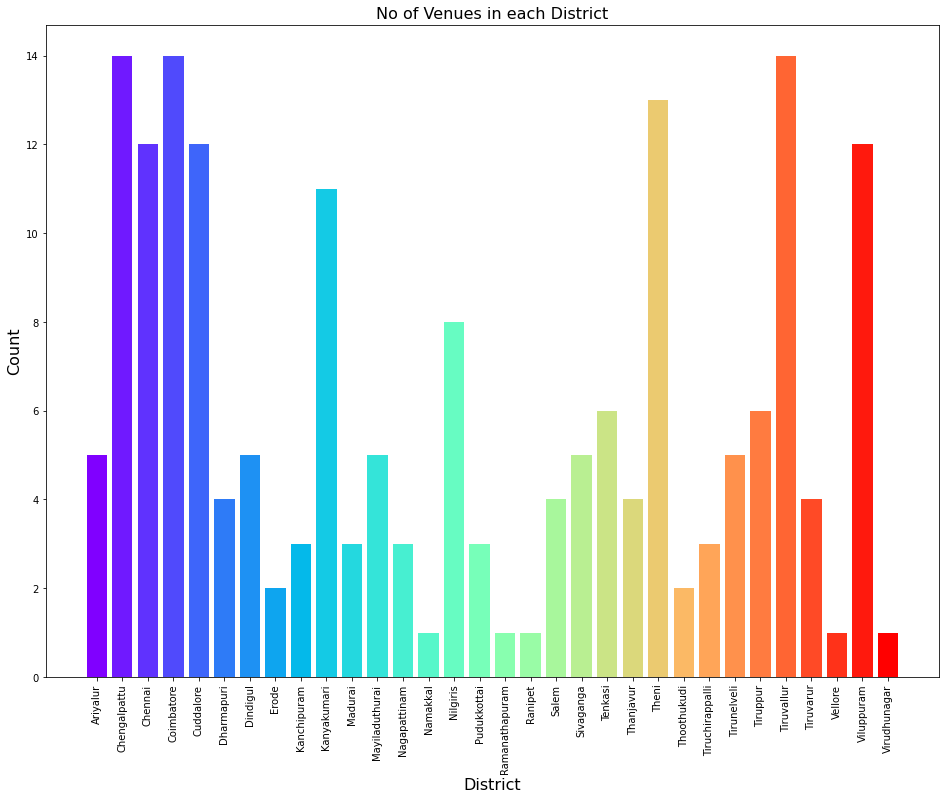

In [29]:
#Count number of venues retrieved in each District
color = cm.rainbow(np.linspace(0, 1, len(no_of_venues["No of Venues"])))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(no_of_venues["District"], no_of_venues["No of Venues"], color = color)

In [30]:
len(state_venues['Venue Category'].unique())

30

In [31]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Historic Site', 'Pool', 'Garden', 'Museum', 'Beach',
       'Sculpture Garden', 'Zoo', 'Racetrack', 'Bar', 'Theme Park',
       'Performing Arts Venue', 'Movie Theater', 'Park',
       'Athletics & Sports', 'Mountain', 'Other Great Outdoors',
       'Water Park', 'Trail', 'Scenic Lookout', 'Lounge', 'Art Gallery',
       'Lake', 'Outdoors & Recreation', 'Arcade', 'Castle', 'River',
       'National Park', 'Forest', 'Roof Deck', 'Harbor / Marina'],
      dtype=object)

### Analyze Each District

In [32]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Arcade,Art Gallery,Athletics & Sports,Bar,Beach,Castle,Forest,Garden,Harbor / Marina,...,Pool,Racetrack,River,Roof Deck,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Water Park,Zoo
0,Ariyalur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ariyalur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ariyalur,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,Ariyalur,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Ariyalur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Group rows by neighborhood taking the mean of the frequency of occurrence of each category
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Arcade,Art Gallery,Athletics & Sports,Bar,Beach,Castle,Forest,Garden,Harbor / Marina,...,Pool,Racetrack,River,Roof Deck,Scenic Lookout,Sculpture Garden,Theme Park,Trail,Water Park,Zoo
0,Ariyalur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,...,0.20,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Chengalpattu,0.000000,0.000000,0.000000,0.071429,0.428571,0.000000,0.000000,0.000000,0.0,...,0.00,0.142857,0.0,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429
2,Chennai,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.0,...,0.00,0.083333,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333
3,Coimbatore,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.142857,0.0,...,0.00,0.071429,0.0,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.000000
4,Cuddalore,0.000000,0.083333,0.000000,0.000000,0.583333,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
5,Dharmapuri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Dindigul,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Erode,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kanchipuram,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.333333,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
9,Kanyakumari,0.090909,0.000000,0.000000,0.000000,0.181818,0.090909,0.000000,0.000000,0.0,...,0.00,0.000000,0.0,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000


In [34]:
#Print each District along with the top 5 most common venues
num_top_venues = no_of_venues['No of Venues'].max()

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ariyalur----
                    venue  freq
0           Historic Site   0.4
1                  Garden   0.2
2                    Pool   0.2
3                  Museum   0.2
4                  Arcade   0.0
5   Outdoors & Recreation   0.0
6              Water Park   0.0
7                   Trail   0.0
8              Theme Park   0.0
9        Sculpture Garden   0.0
10         Scenic Lookout   0.0
11              Roof Deck   0.0
12                  River   0.0
13              Racetrack   0.0


----Chengalpattu----
                    venue  freq
0                   Beach  0.43
1               Racetrack  0.14
2                     Zoo  0.07
3                     Bar  0.07
4              Theme Park  0.07
5        Sculpture Garden  0.07
6   Performing Arts Venue  0.07
7                  Museum  0.07
8   Outdoors & Recreation  0.00
9              Water Park  0.00
10                  Trail  0.00
11         Scenic Lookout  0.00
12              Roof Deck  0.00
13                  River  0.00


In [35]:
#Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
#Create the new dataframe and display the top 10 venues for each district
num_top_venues = no_of_venues['No of Venues'].max()

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category,11th Most Common Venue Category,12th Most Common Venue Category,13th Most Common Venue Category,14th Most Common Venue Category
0,Ariyalur,Historic Site,Museum,Garden,Pool,Movie Theater,Art Gallery,Athletics & Sports,Bar,Beach,Castle,Forest,Harbor / Marina,Lake,Lounge
1,Chengalpattu,Beach,Racetrack,Zoo,Bar,Performing Arts Venue,Museum,Sculpture Garden,Theme Park,Roof Deck,Lake,Art Gallery,Athletics & Sports,Trail,Castle
2,Chennai,Beach,Bar,Zoo,Racetrack,Movie Theater,Park,Museum,Theme Park,River,Lake,Art Gallery,Athletics & Sports,Trail,Castle
3,Coimbatore,Movie Theater,Park,Garden,Other Great Outdoors,Trail,Mountain,Athletics & Sports,Scenic Lookout,Bar,Racetrack,Water Park,Zoo,Harbor / Marina,Castle
4,Cuddalore,Beach,Art Gallery,Scenic Lookout,Park,Historic Site,Lounge,Zoo,Movie Theater,Athletics & Sports,Bar,Castle,Forest,Garden,Harbor / Marina


In [37]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Ariyalur,Garden,Gangai Konda Chozhapuram
1,Ariyalur,Historic Site,"Tanjavur Chola's Big Temple, Tanjavur"
2,Ariyalur,Museum,Thanjavur Royal Palace & Museum
3,Ariyalur,Pool,Maha Magam Tank
4,Chengalpattu,Bar,Z The Tapas Bar & Restaurant


In [38]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

In [39]:
#Most common venues according to venue category in each District
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(no_of_venues['No of Venues'].max()):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue
0,Ariyalur,"Tanjavur Chola's Big Temple, Tanjavur",Thanjavur Royal Palace & Museum,Gangai Konda Chozhapuram,Maha Magam Tank,,,,,,,,,,
1,Chengalpattu,"Mahabalipuram, Thiruvanmiyur Beach, 4th Seawar...","MMSC Race Track, Kart Attack",Crocodile Bank,Z The Tapas Bar & Restaurant,Kalakshetra,DakshinaChitra,Krishna's Butter Ball,Queen's Land Amusement Park,,,,,,
2,Chennai,"Marina Beach | மெரினா கடற்கரை (Marina Beach), ...","Blend - The High Energy Bar, Z The Tapas Bar &...",Arignar Anna Zoological Park,MMSC Race Track,Sathyam Cinemas,Anna Nagar Tower Park,DakshinaChitra,Queen's Land Amusement Park,,,,,,
3,Coimbatore,"Sri Sakthi Theatres, Priyadarsini Theatre","Race Course Road, Silent Valley National Park","Malampuzha Dam and Garden, Sim's Park",Palakkad Tipu Sultan's Fort,Bedford,Coonoor,Decathlon,Lamb's Rock,Tease,Kari Motor Speedway,Black Thunder,,,
4,Cuddalore,"Zest Private Beach, Paradise Beach, Pondicherr...",Artika,Matrimandir,Bharathi Park,Gandhi Statue,LB 2 Lounge,,,,,,,,
5,Dharmapuri,"Lady's Seat, Hogenakkal Falls",Five roads,Yercaud,,,,,,,,,,,
6,Dindigul,"Vetri theatre, Big Cinemas, Big Cinemas Ganesh...",Tirumalai Nayak Palace,,,,,,,,,,,,
7,Erode,Sri Sakthi Theatres,Thindal,,,,,,,,,,,,
8,Kanchipuram,Arignar Anna Zoological Park,Queen's Land Amusement Park,MMSC Race Track,,,,,,,,,,,
9,Kanyakumari,"Suchidram temple, Triveni Sangam, Padmanabhapu...","Sunrise Point, Kanyakumari Beach",End of the Land,Vivekananda Rock Memorial,Sunset View Point,Vattakottai Fort,Thirparappu Falls,,,,,,Vivekananda Rock Memorial,


### Nearby Businesses

In [40]:
LIMIT = 100

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [41]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Tanjavur Chola's Big Temple
Tanjavur
Maha Magam Tank
Gangai Konda Chozhapuram
Thanjavur Royal Palace & Museum
DakshinaChitra
Mahabalipuram
Krishna's Butter Ball
Thiruvanmiyur Beach
4th Seaward Road Beach
Thiruvanmiyur RTO Beach
Crocodile Bank
ECR Beach, Chennai
MMSC Race Track
Kart Attack
Z The Tapas Bar & Restaurant
Pallavakam Beach
Queen's Land Amusement Park
Kalakshetra
Sathyam Cinemas
Blend - The High Energy Bar
Anna Nagar Tower Park
Marina Beach | மெரினா கடற்கரை (Marina Beach)
Z The Tapas Bar & Restaurant
Thiruvanmiyur Beach
4th Seaward Road Beach
Thiruvanmiyur RTO Beach
DakshinaChitra
MMSC Race Track
Queen's Land Amusement Park
Arignar Anna Zoological Park
Decathlon
Race Course Road
Tease
Kari Motor Speedway
Coonoor
Sri Sakthi Theatres
Malampuzha Dam and Garden
Priyadarsini Theatre
Palakkad Tipu Sultan's Fort
Sim's Park
Black Thunder
Silent Valley National Park
Bedford
Lamb's Rock
Zest Private Beach
Paradise Beach
Pondicherry Rock Beach
Promenade Beach
Bharathi Park
LB 2 Lounge
M

In [42]:
nearby_business

,Venue,Business,BLatitude,BLongitude,Business Category
3,Tanjavur Chola's Big Temple,Brihadisvara temple,10.783126,79.133005,Tourist Information Center
4,Tanjavur Chola's Big Temple,Vasantha Bavan,10.778949,79.130827,Asian Restaurant
6,Tanjavur,lakshmi hotel,10.774662,79.138512,Asian Restaurant
7,Tanjavur,PLA bamboo Restaurant,10.777003,79.141566,Asian Restaurant
8,Tanjavur,"Thanjavur Junction, Railway Station",10.778159,79.138782,Train Station
...,...,...,...,...,...
1541,Artika,Villa Krish,11.929812,79.833530,Hotel
1543,Paradise Beach,Le Pondy,11.870293,79.817541,Hotel
1547,Serenity Beach,Bodhi Cafe,11.971132,79.844410,Café
1550,Serenity Beach,Theevu Plage,11.970995,79.844329,Seafood Restaurant


In [43]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,ATM,4
1,African Restaurant,3
2,American Restaurant,2
3,Arts & Crafts Store,3
4,Asian Restaurant,34
...,...,...
61,Tea Room,3
62,Tourist Information Center,4
63,Toy / Game Store,2
64,Train Station,6


In [44]:
len(nearby_business['Business Category'].unique())

66

### Analyse all business categories

In [45]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,ATM,African Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bistro,Boat or Ferry,...,Shop & Service,Shopping Mall,Snack Place,Sporting Goods Shop,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant
3,Tanjavur Chola's Big Temple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Tanjavur Chola's Big Temple,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tanjavur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Tanjavur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Tanjavur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
#Group rows by venues taking the mean of the frequency of occurrence of each category
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,ATM,African Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bistro,Boat or Ferry,...,Shop & Service,Shopping Mall,Snack Place,Sporting Goods Shop,Steakhouse,Tea Room,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant
0,4th Seaward Road Beach,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0
1,Anna Nagar Tower Park,0.0,0.000000,0.0,0.000000,0.05,0.100000,0.000000,0.05,0.0,...,0.0,0.0,0.050000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.1
2,Arignar Anna Zoological Park,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,Artika,0.0,0.000000,0.0,0.000000,0.00,0.043478,0.000000,0.00,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,Bandipur National Park,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Vivekananda Rock Memorial,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.2,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
76,Yercaud,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
77,Z The Tapas Bar & Restaurant,0.0,0.037037,0.0,0.037037,0.00,0.000000,0.037037,0.00,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.037037,0.0,0.0,0.0,0.0
78,Zest Private Beach,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [47]:
#Print the top 5 most common business with the venues
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----4th Seaward Road Beach----
                 venue  freq
0           Food Truck  0.14
1                Diner  0.14
2                Hotel  0.14
3    Indian Restaurant  0.14
4  Sporting Goods Shop  0.14


----Anna Nagar Tower Park----
                           venue  freq
0              Indian Restaurant  0.15
1  Vegetarian / Vegan Restaurant  0.10
2                         Bakery  0.10
3              Electronics Store  0.10
4                   Burger Joint  0.05


----Arignar Anna Zoological Park----
               venue  freq
0  Indian Restaurant  0.33
1       Intersection  0.33
2        Bus Station  0.33
3                ATM  0.00
4             Market  0.00


----Artika----
                venue  freq
0               Hotel  0.30
1                Café  0.13
2          Restaurant  0.13
3  Italian Restaurant  0.09
4         Pizza Place  0.09


----Bandipur National Park----
                       venue  freq
0                  Rest Area   1.0
1                        ATM   0.0
2    

In [48]:
#function to sort the business in descending order
def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [49]:
# 10 Most common venues according to venue category in each District
num_top_business = 10

indicators = ['st', 'nd', 'rd']

columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,4th Seaward Road Beach,Indian Restaurant,Coffee Shop,Food Truck,Burger Joint,Sporting Goods Shop,Diner,Hotel,Department Store,Comfort Food Restaurant,Cosmetics Shop
1,Anna Nagar Tower Park,Indian Restaurant,Vegetarian / Vegan Restaurant,Electronics Store,Bakery,Clothing Store,Juice Bar,Coffee Shop,Fast Food Restaurant,Burger Joint,Restaurant
2,Arignar Anna Zoological Park,Intersection,Bus Station,Indian Restaurant,Dessert Shop,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Vegetarian / Vegan Restaurant
3,Artika,Hotel,Café,Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Diner,Dessert Shop,Bakery,French Restaurant
4,Bandipur National Park,Rest Area,Vegetarian / Vegan Restaurant,Deli / Bodega,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Department Store,Café


### K-Means Clustering

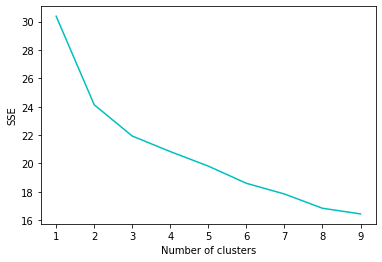

In [50]:
# Finding the optimal K value
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color = "c")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [51]:
#Run k-means to cluster the neighbourhoods into 5 clusters
# set number of clusters
kclusters = 3
nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [52]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering label
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge nearby_business_grouped with nearby_business to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
3,Tanjavur Chola's Big Temple,10.782957,79.132663,1,Tourist Information Center,Asian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Diner
6,Tanjavur,10.777151,79.142018,1,Asian Restaurant,Train Station,Dessert Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Vegetarian / Vegan Restaurant
10,Maha Magam Tank,10.956496,79.381546,2,Hotel,Bus Station,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Dessert Shop
16,Thanjavur Royal Palace & Museum,10.791840,79.136781,2,Hotel,Candy Store,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
20,DakshinaChitra,12.823047,80.242054,0,Café,Indian Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,"Tea Gardens, Munnar",10.041145,77.039133,2,Hotel,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
1071,Punarjani Traditional Village,10.041339,77.036564,2,Hotel,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
1077,Tea Museum,10.094154,77.050459,1,Deli / Bodega,Vegetarian / Vegan Restaurant,Candy Store,Flea Market,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop
1080,Dolphin's Nose,10.219640,77.485330,1,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store


### Cluster Map

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
map_clusters 

### Cluster Examination

#### Cluster 1

In [54]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
20,DakshinaChitra,Café,Indian Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
436,Malampuzha Dam and Garden,Indian Restaurant,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
452,Black Thunder,Café,Indian Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
680,Guru Theater,Bus Station,Electronics Store,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Dessert Shop
765,Thirparappu Falls,Bus Station,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Dessert Shop,Candy Store
804,Karaikal Beach,Indian Restaurant,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
849,Bandipur National Park,Rest Area,Vegetarian / Vegan Restaurant,Deli / Bodega,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Department Store,Café


#### Cluster 2

In [55]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
3,Tanjavur Chola's Big Temple,Tourist Information Center,Asian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Diner
6,Tanjavur,Asian Restaurant,Train Station,Dessert Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Vegetarian / Vegan Restaurant
24,Mahabalipuram,Restaurant,Café,Fast Food Restaurant,Breakfast Spot,Cosmetics Shop,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Vegetarian / Vegan Restaurant
33,Krishna's Butter Ball,Restaurant,Seafood Restaurant,Bus Station,Burger Joint,Coffee Shop,Indian Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Comfort Food Restaurant,Cosmetics Shop
46,Thiruvanmiyur Beach,Indian Restaurant,Hotel,Restaurant,Diner,Food Truck,Sporting Goods Shop,Burger Joint,Italian Restaurant,Coffee Shop,Comfort Food Restaurant
65,4th Seaward Road Beach,Indian Restaurant,Coffee Shop,Food Truck,Burger Joint,Sporting Goods Shop,Diner,Hotel,Department Store,Comfort Food Restaurant,Cosmetics Shop
81,Thiruvanmiyur RTO Beach,Indian Restaurant,Coffee Shop,Food Truck,Burger Joint,Sporting Goods Shop,Diner,Hotel,Department Store,Comfort Food Restaurant,Cosmetics Shop
98,"ECR Beach, Chennai",Italian Restaurant,Burger Joint,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Vegetarian / Vegan Restaurant,Candy Store
102,MMSC Race Track,Food Court,Candy Store,Flea Market,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
105,Kart Attack,Bistro,Italian Restaurant,Bus Stop,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Vegetarian / Vegan Restaurant,Chocolate Shop


#### Cluster 3

In [56]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
10,Maha Magam Tank,Hotel,Bus Station,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Dessert Shop
16,Thanjavur Royal Palace & Museum,Hotel,Candy Store,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
95,Crocodile Bank,Restaurant,Hotel,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Dessert Shop
110,Z The Tapas Bar & Restaurant,Indian Restaurant,Hotel,Café,Electronics Store,Juice Bar,Mexican Restaurant,Italian Restaurant,Comfort Food Restaurant,Restaurant,Sandwich Place
166,Queen's Land Amusement Park,Hotel,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
168,Kalakshetra,Hotel,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop,Department Store
379,Arignar Anna Zoological Park,Intersection,Bus Station,Indian Restaurant,Dessert Shop,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Vegetarian / Vegan Restaurant
440,Priyadarsini Theatre,Light Rail Station,Indian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Dessert Shop
444,Palakkad Tipu Sultan's Fort,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Diner
448,Sim's Park,Hotel,Coffee Shop,Vegetarian / Vegan Restaurant,Candy Store,Fast Food Restaurant,Fabric Shop,Electronics Store,Donut Shop,Diner,Dessert Shop
